In [1]:
import json
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, pos_tag
import numpy as np

JSON_FILE = "/home/xinyi/volta/datasets/mscoco/dataset_coco.json"
IMAGE_DIR = "/home/xinyi/volta/datasets/mscoco/images"

with open(JSON_FILE, "r") as f:
    data = json.load(f)
items = data["images"]

In [2]:
# Tools
def isActionSentence(sent_tokens):
    sentence = pos_tag(sent_tokens)
    grammar = r'CHUNK: {<N.*>+<.*>?<V.*>+<.*>?<N.*>+}'
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(sentence)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK': 
            return True
    return False

# Active/passive

In [4]:
img_list=[1, 6, 5230, 87047,79198, 854]
TEXT_FILE = "/home/xinyi/Language_Reasoning_Test/passive.txt"
with open(TEXT_FILE) as f:
    texts = f.read()
texts = texts.lower().split("\n")

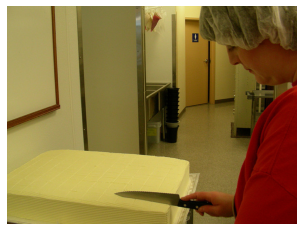

Original:  A woman wearing a net on her head cutting a cake. 
Constructed
['a woman is cutting a cake', 'a cake is being cut by a woman', 'a cake is cutting a woman', 'a woman is being cut by a cake']



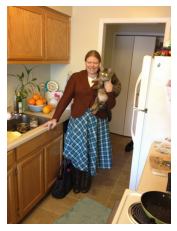

Original:  a woman is holding a cat in her kitchen
Constructed
['a woman is holding a cat', 'a cat is being held by a woman', 'a cat is holding a woman', 'a woman is being held by a cat']



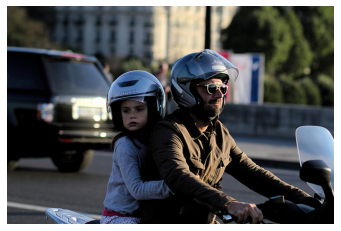

Original:  Young girl with helmet on hold on tight to her father driving the motorcycle.
Constructed
['a girl holds on tight to a man', 'a man is held on tight by a girl', 'a man holds on tight to a girl', 'a girl is held on tight by a man']



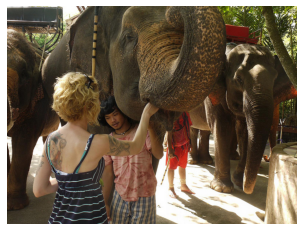

Original:  A woman in a striped dress feeding an elephant.
Constructed
['a woman in a striped dress is feeding an elephant', 'an elephant is fed by a woman in a striped dress', 'an elephant in a striped dress is feeding a woman', 'a woman is fed by an elephant in a striped dress']



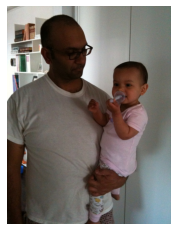

Original:  A man holding a baby in a room.
Constructed
['a man is holding a baby', 'a baby is held by a man', 'a baby is holding a man', 'a man is held by a baby']



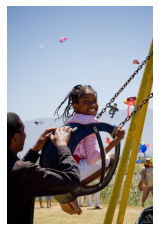

Original:  A man pushing a girl on a swing.
Constructed
['a man is pushing a girl on a swing', 'a girl on a swing is pushd by a man', 'a man is pushing a girl on a swing', 'a girl on a swing is pushd by a man']



In [7]:
# show images and their original caption
for i, index in enumerate(img_list):
    item = items[index]
    img_path = os.path.join(IMAGE_DIR, item['filepath'],item['filename'])
    image = mpimg.imread(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    for sent in item['sentences']:
        if isActionSentence(sent["tokens"]):
            print("Original: ", sent["raw"])
            print("Constructed")
            print(texts[i*4:(i+1)*4])
            break
    print()